$\newcommand{\unit}[1]{\mathrm{\; #1}}$ 
 $\newcommand{\ce}[1]{\mathrm{#1}}$


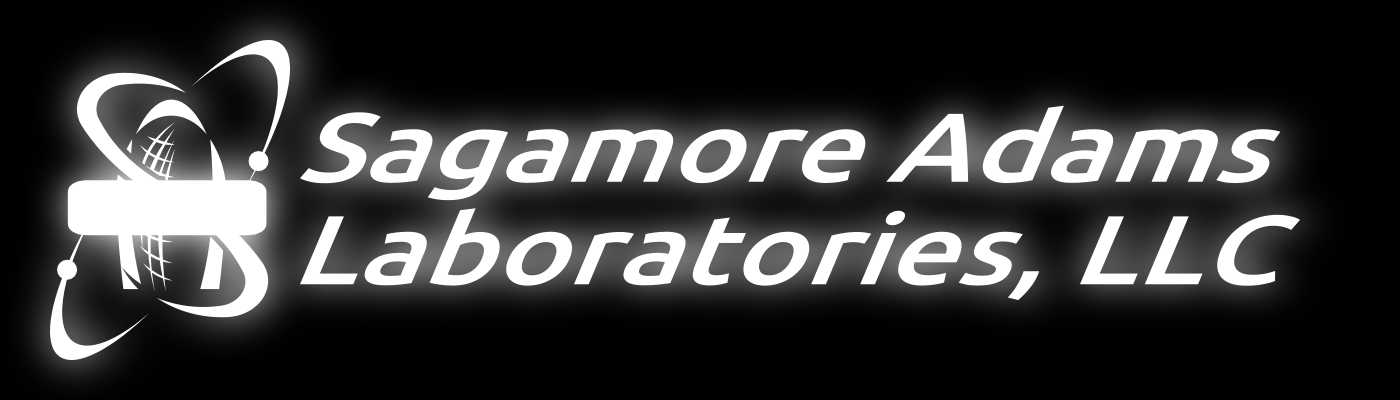
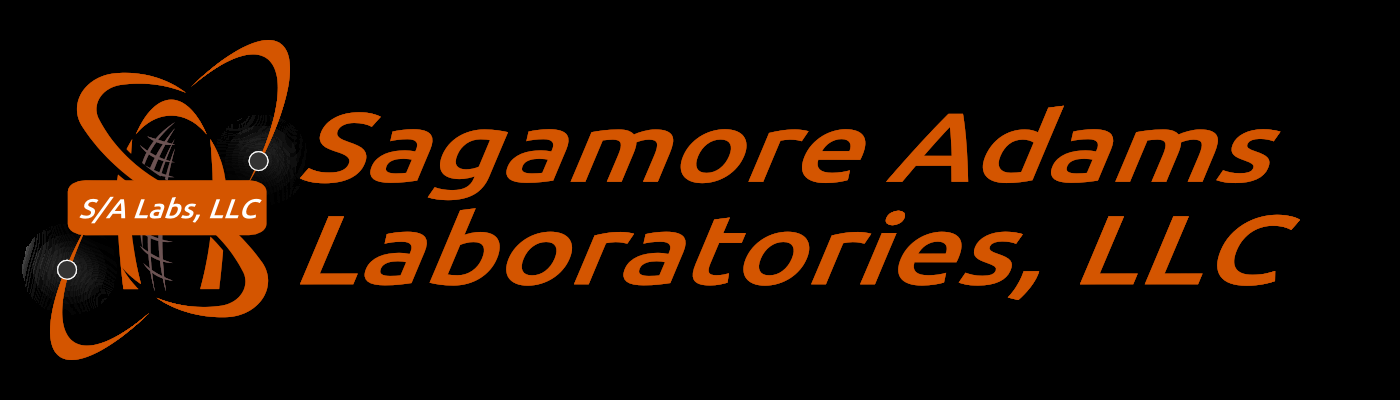

In [1]:
import lyxithea.lyxithea as lyx
import lyxithea.puslides as lyxs
from pyg import twod as pyg2d
import numpy as np

lyx.exporting(False)
lyx.latex(False)

pyg2d.context("slides")
bib = lyx.bib('bibs/nonproliferation.bib')
slides = lyxs.puslides(bib)
slides.chapter_paths(['~/scholarship/duec/'])
slides.title('Nuclear Nonproliferation Export Controls and Dual Use: A Crash Course')
slides.author('Alex Hagen')
slides.subtitle('Internal Presentation')
slides.affiliation('Purdue University')
slides.venue('ANL\'s CSS and Purdue University')
slides.city('Lafayette, IN and Darien, IL')

In [ ]:
slides.part('Front Matter')
slides.chapter('Objective')

In [2]:
# Objective slide

In [3]:
# sourcebook slide

In [4]:
# motivation slide - nuclear weapon USE in total

In [5]:
# motivation slide - nuclear weapon to unknown or non-traditional power

In [7]:
# introduction slide - non proliferation in general - flowchart

In [8]:
# introduction slide - non proliferation's dubious history

In [9]:
# introduction slide - export control in flowchart